# Applying filter on geophysical signals-- Presented by Himanshu Bhardwaj

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hemi_frequency_filter as hft

**A base station reading for a magnetic survey has been taken into account for applying frequency filtering**

Each reading has been taken with 2 minutes intervals.

In [3]:
dt = pd.read_csv('bse2.csv')
dt.head()

,dt,time
0,45677.6,8:30:27
1,45677.3,8:32:27
2,45676.9,8:34:27
3,45677.8,8:36:27
4,45677.6,8:38:27


In [4]:
dt['mag'] = dt['dt']
dt['time'] = pd.to_datetime(dt['time'], format="%H:%M:%S")
dt['abs_time'] = 3600*dt['time'].dt.hour+60*dt['time'].dt.minute + dt['time'].dt.second
dt['abs_time'] = dt['abs_time']-dt['abs_time'][0]

**Lets plot the signal**

Text(0, 0.5, 'Magnetic Value in nT')

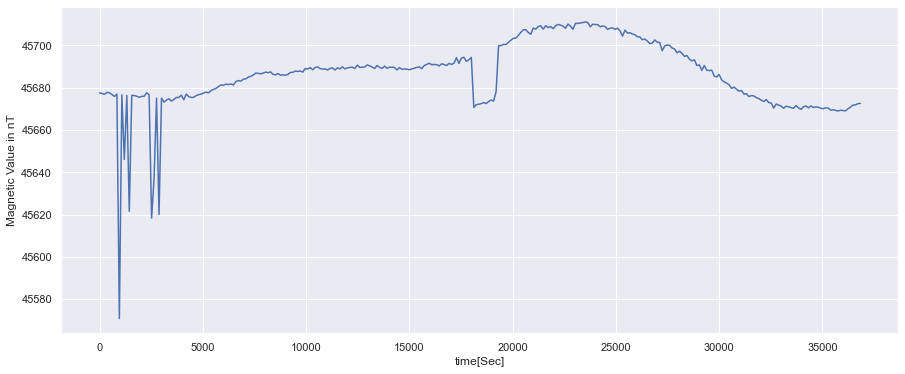

In [5]:
sns.set()
plt.figure(figsize= (15,6))
plt.plot(dt['abs_time'], dt['dt'])
plt.xlabel('time[Sec]')
plt.ylabel('Magnetic Value in nT')

**Here sample frequency is 2 min**

In [6]:
fs = 1/120
nperseg = 80
noverlap = nperseg - 4

**Spectrogram of the signal**

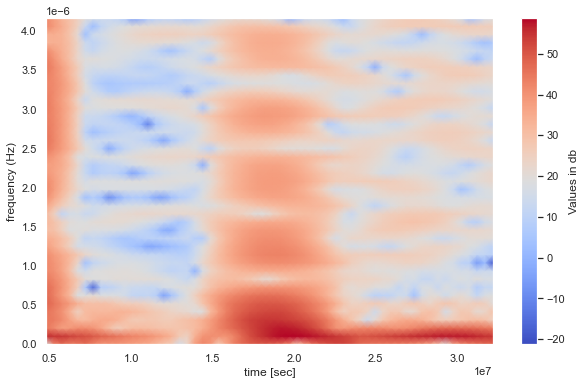

In [7]:
ax = plt.figure(figsize=(10,6))
ax = hft.spectogram_plot(dt['mag'].values, fs, nperseg, noverlap, window='hann')
plt.show()

**Applying butterworth filter with cutoff frequency 0.00015 Hz and corresponding spectrogram**

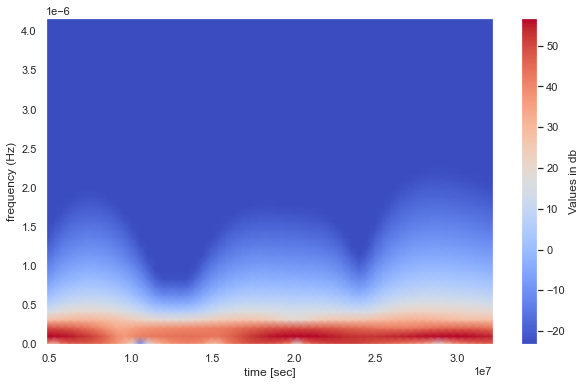

In [8]:
filtered_d = hft.butter_lowpass_filter(dt['dt'].values, 0.00015,fs, 8)
#f,t,filteredspec = hft.spectrogram(filtered_d, fs=fs, nperseg=nperseg, noverlap=noverlap, window='hann')
ax = plt.figure(figsize=(10,6))
ax = hft.spectogram_plot(filtered_d, fs, nperseg, noverlap, window='hann')
plt.show()

**Butterworth filter with cutoff value 0.0002 Hz**

In [9]:
filtered_md = hft.butter_lowpass_filter(dt['dt'].values, 0.0002,fs, 10)

**Plot showing the results of lowpass filters with cutoff frequencies 0.00015 Hz and 0.0002 Hz**

Text(0, 0.5, 'Magnetic Value in nT')

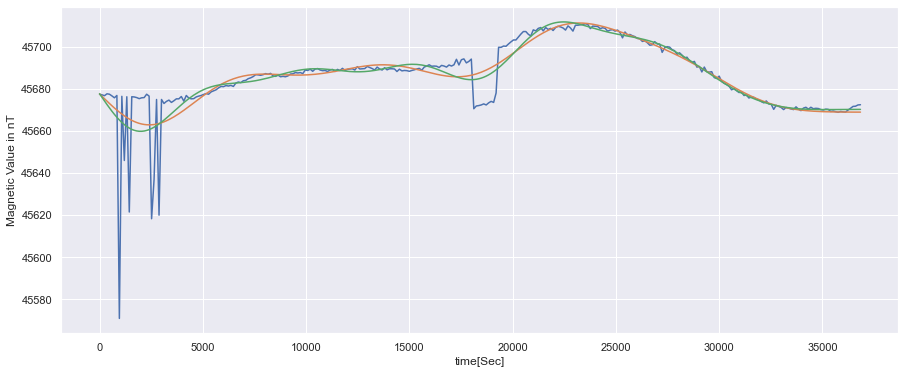

In [10]:
plt.figure(figsize= (15,6))
plt.plot(dt['abs_time'], dt['dt'])
plt.plot(dt['abs_time'], filtered_d)
plt.plot(dt['abs_time'], filtered_md)
plt.xlabel('time[Sec]')
plt.ylabel('Magnetic Value in nT')

**Let us remove some bad data points**

In [11]:
import statsmodels.api as sm
import pylab as py

**QQ-plot**

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


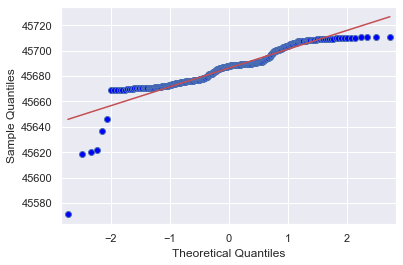

In [12]:
ax = sm.qqplot(dt['dt'].values, line='r')
plt.show()

**histogram plot**

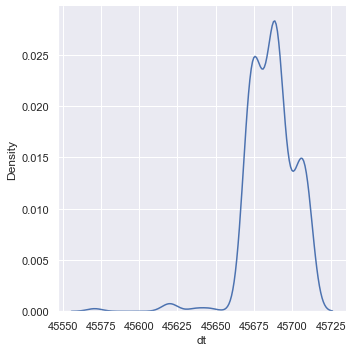

In [13]:
ax = sns.displot(dt['dt'], kind='kde')
plt.show()

**Removing the noise with cutoff 

In [14]:
dt['dt'][dt['dt']<=45660] = np.nan
dt['dt'] = dt['dt'].fillna(method='ffill')

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Magnetic Value in nT')

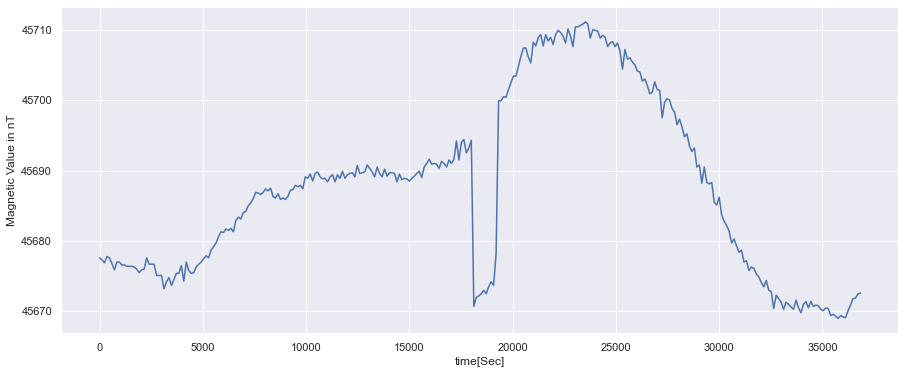

In [15]:
plt.figure(figsize= (15,6))
plt.plot(dt['abs_time'], dt['dt'])
plt.xlabel('time[Sec]')
plt.ylabel('Magnetic Value in nT')

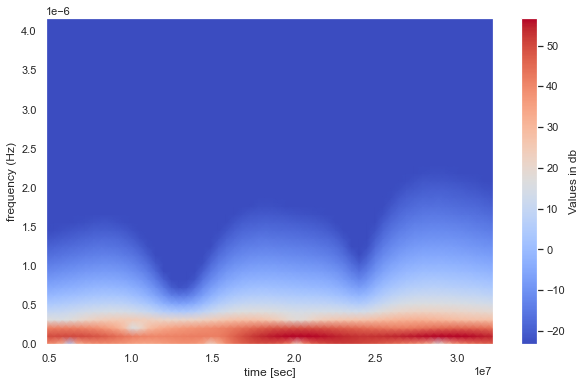

In [16]:
filtered_d = hft.butter_lowpass_filter(dt['dt'].values, 0.00015,fs, 8)
ax = plt.figure(figsize=(10,6))
ax = hft.spectogram_plot(filtered_d, fs, nperseg, noverlap, window='hann')
plt.show()

**Filtered signal**

Text(0, 0.5, 'Magnetic Value in nT')

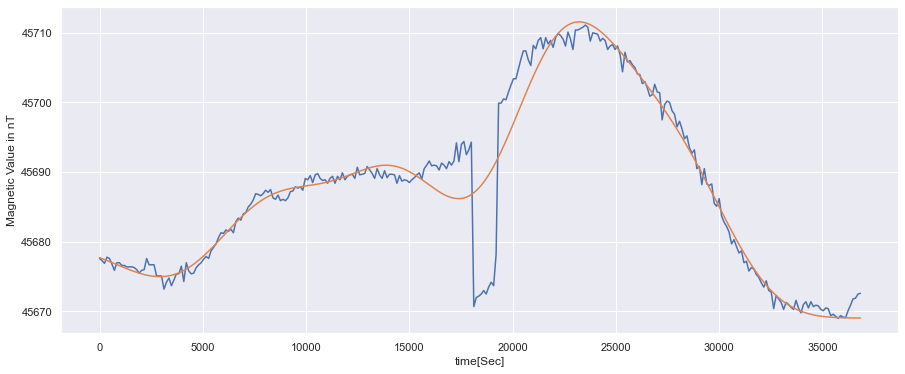

In [17]:
plt.figure(figsize= (15,6))
plt.plot(dt['abs_time'], dt['dt'])
plt.plot(dt['abs_time'], filtered_d)
plt.xlabel('time[Sec]')
plt.ylabel('Magnetic Value in nT')